In [1]:
import h5py as h5
import numpy as np
import torch
import matplotlib.pyplot as plt

from train.data import DeepCleanDataset as dc_dataset

%matplotlib inline

In [2]:
fname = "/home/kamalan/dc-demo/data/L-L1_lldata-1369291863-16384.hdf5"
channels = [
    "L1:GDS-CALIB_STRAIN",
    "L1:PEM-CS_MAINSMON_EBAY_1_DQ",
]
kernel_length = 8
freq_low = [55]
freq_high = [65]
batch_size = 32
train_duration = 128 
test_duration = 128
valid_frac = 0.
train_stride = 0.25
inference_sampling_rate = 64
start_offset = 0
filt_order = 8

dset = dc_dataset(
    fname=fname,
    channels=channels,
    kernel_length=kernel_length,
    freq_low=freq_low,
    freq_high=freq_high,
    batch_size=batch_size,
    train_duration=train_duration,
    test_duration=test_duration,
    valid_frac=valid_frac,
    train_stride=train_stride,
    inference_sampling_rate=inference_sampling_rate,
    start_offset=start_offset,
    filt_order=filt_order,
)

In [3]:
train_wit, train_strain = dset.setup(stage='fit')
wit, strain = dset.load_timeseries('train')

In [4]:
print(train_strain.shape, train_wit.shape)
print(strain.shape, wit.shape)

torch.Size([524288]) torch.Size([1, 524288])
torch.Size([524288]) torch.Size([1, 524288])


### Bandpassing before Normalizing

In [6]:
print(train_strain[:10])

tensor([0.0002, 0.0006, 0.0011, 0.0015, 0.0019, 0.0022, 0.0026, 0.0029, 0.0032,
        0.0035])


In [6]:
print(train_strain[:10])

tensor([ 1.9267,  5.5266,  9.0735, 12.5375, 15.8896, 19.1020, 22.1478, 25.0017,
        27.6401, 30.0413])


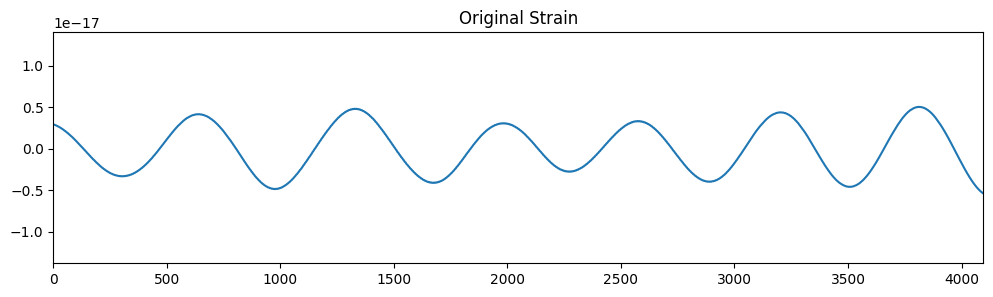

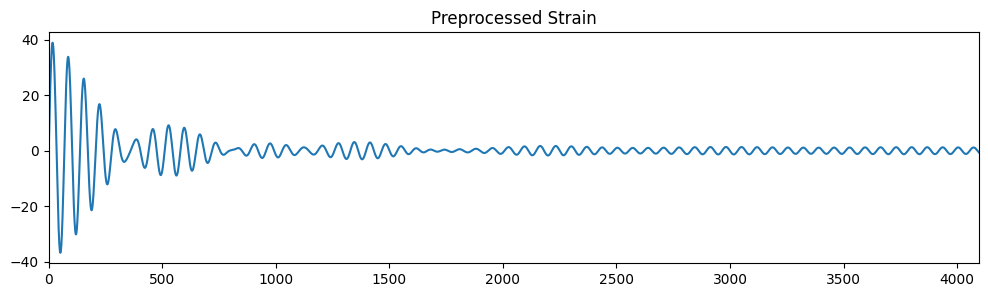

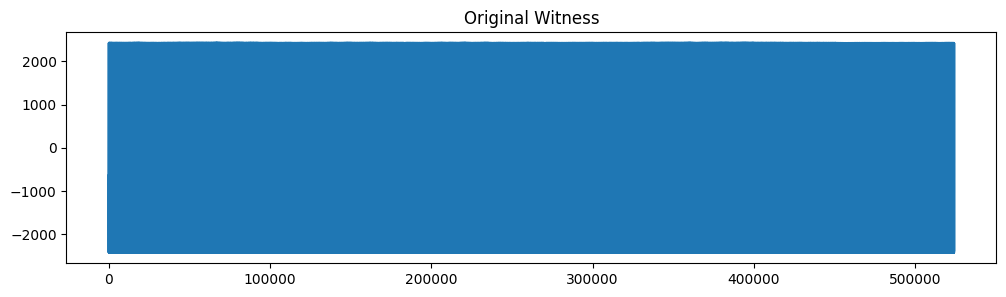

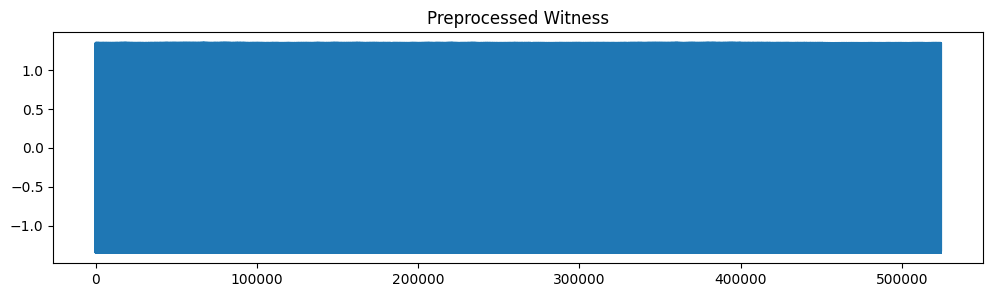

In [5]:
n = 0
plt.figure(figsize=(12,3))
plt.plot(strain)
plt.title(f"Original Strain")
plt.xlim([n*4096, (n+1)*4096])
plt.show()
plt.figure(figsize=(12,3))
plt.plot(train_strain)
plt.title(f"Preprocessed Strain")
plt.xlim([n*4096, (n+1)*4096])
plt.show()

plt.figure(figsize=(12,3))
plt.plot(wit[0])
plt.title(f"Original Witness")
plt.show()
plt.figure(figsize=(12,3))
plt.plot(train_wit[0])
plt.title(f"Preprocessed Witness")
plt.show()

### Normalizing before Bandpassing

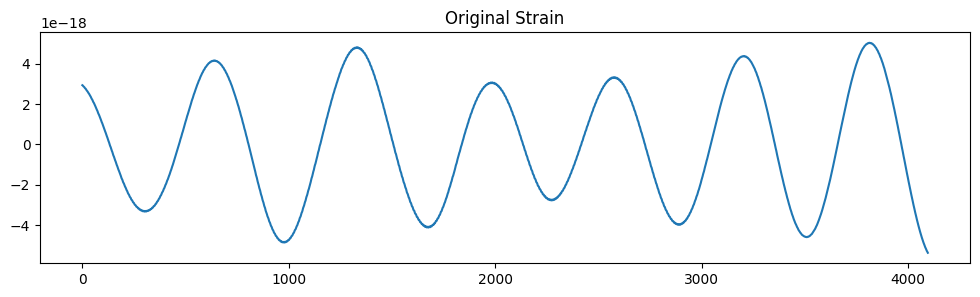

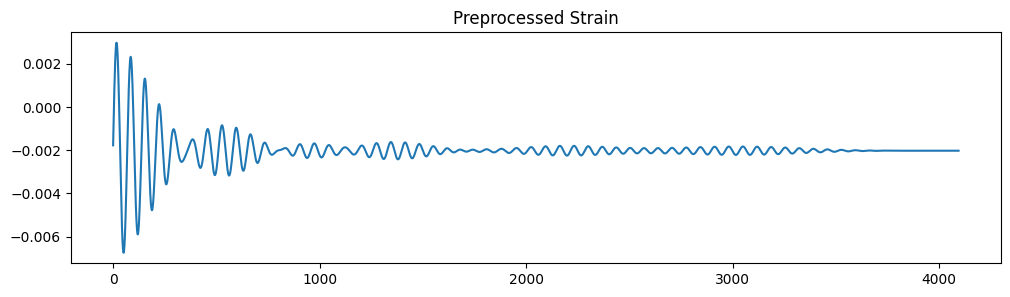

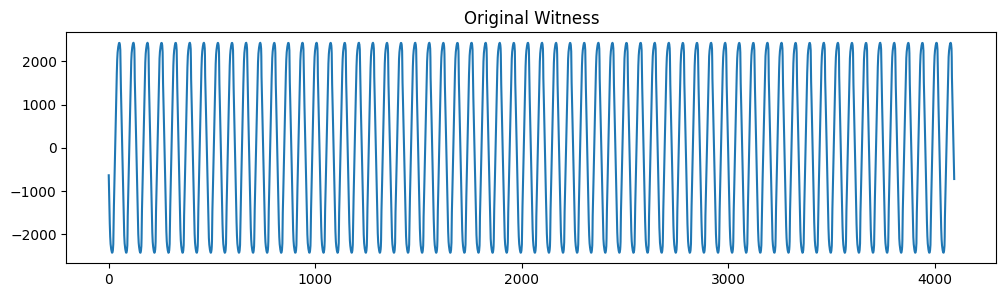

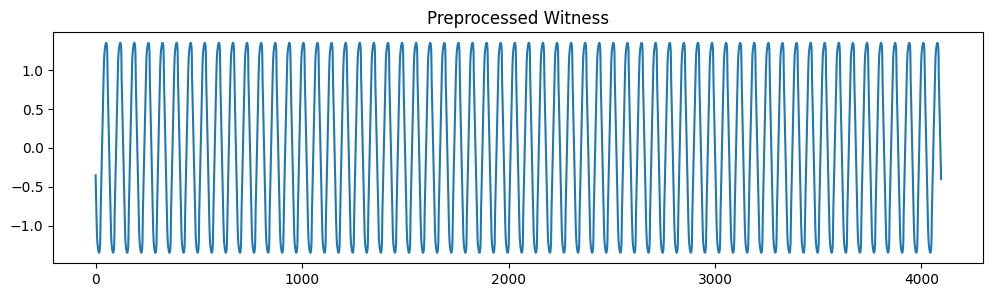

In [5]:
plt.figure(figsize=(12,3))
plt.plot(strain)
plt.title(f"Original Strain")
plt.show()
plt.figure(figsize=(12,3))
plt.plot(train_strain)
plt.title(f"Preprocessed Strain")
plt.show()

plt.figure(figsize=(12,3))
plt.plot(wit[0])
plt.title(f"Original Witness")
plt.show()
plt.figure(figsize=(12,3))
plt.plot(train_wit[0])
plt.title(f"Preprocessed Witness")
plt.show()

In [16]:
ifo = 'L1'
fname = f"/home/kamalan/dc-demo/testing/{ifo[0]}-{ifo}_lldata-1369291863-16384.hdf5"
with h5.File(fname, 'a') as f:
    for key in f.keys():
        f[key].attrs['t0'] = 1369291863
        f[key].attrs['sample_rate'] = 4096

In [20]:
with h5.File(fname, 'r') as f:
    print(f[channels[0]].attrs['t0'])
    print(f[channels[0]].attrs['sample_rate'])

1369291863
4096
